In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
sns.set_style("white")
%matplotlib inline

In [3]:
transaction = pd.read_csv('transactions.csv')

In [4]:
transaction

,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP,IS_FRAUD,ALERT_ID
0,1,6456,9069,TRANSFER,465.05,0,False,-1
1,2,7516,9543,TRANSFER,564.64,0,False,-1
2,3,2445,9356,TRANSFER,598.94,0,False,-1
3,4,2576,4617,TRANSFER,466.07,0,False,-1
4,5,3524,1773,TRANSFER,405.63,0,False,-1
...,...,...,...,...,...,...,...,...
1323229,1323230,3733,8051,TRANSFER,112.98,199,False,-1
1323230,1323231,2536,8732,TRANSFER,459.64,199,False,-1
1323231,1323232,1466,8586,TRANSFER,468.60,199,False,-1
1323232,1323233,1451,3849,TRANSFER,562.36,199,False,-1


### there is no true value of fraud

<AxesSubplot:>

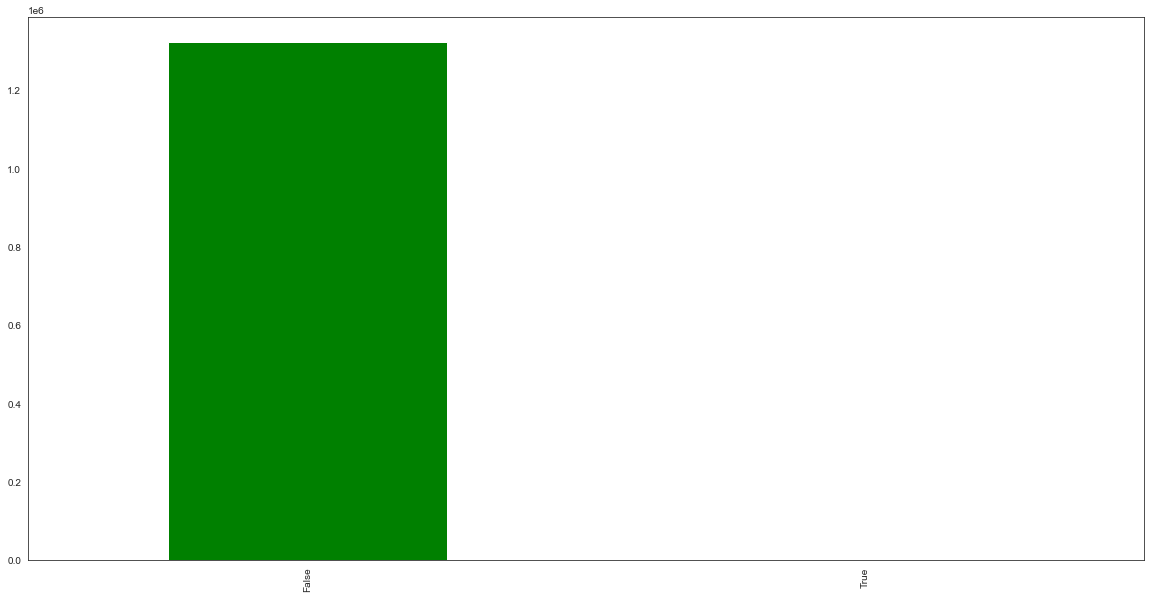

In [5]:
x= transaction['IS_FRAUD'].value_counts().sort_index()
x.plot(kind='bar', figsize=(20,10),color='green')

that meanse there is no fraude detection over here


checking for the top largest transaction values there dose not exist any fraud detection so everything is clear

<AxesSubplot:title={'center':'top transactions'}>

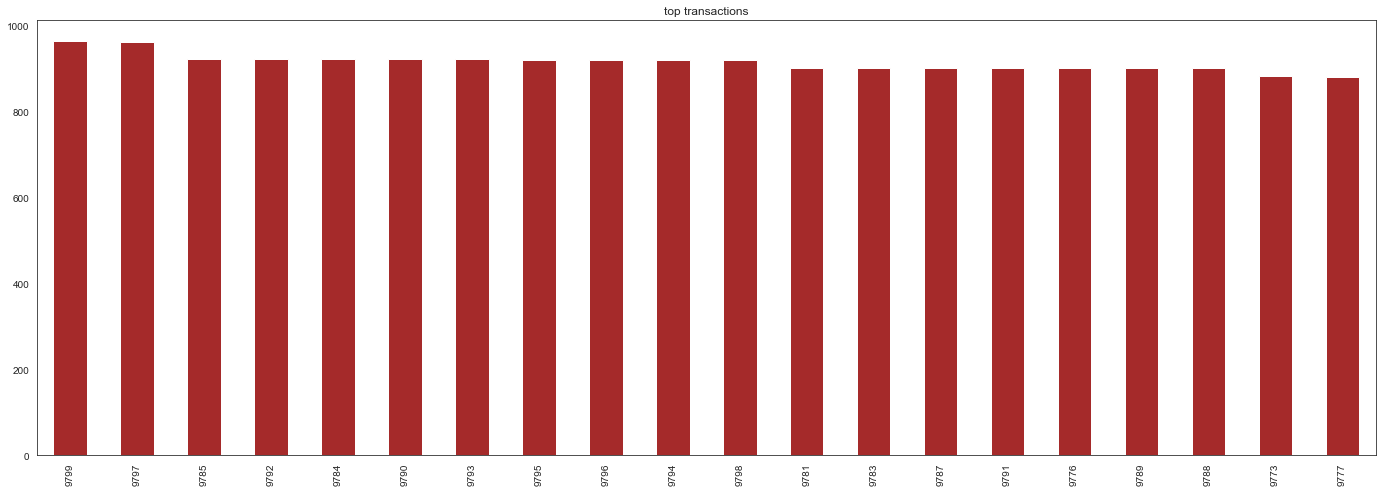

In [28]:
transaction['SENDER_ACCOUNT_ID'].value_counts().nlargest(20).plot(kind='bar',figsize=(24,8),title = "top transactions",color='brown')

top 12 tax amount applied on the transactions

<AxesSubplot:title={'center':'ratings according to turnover'}>

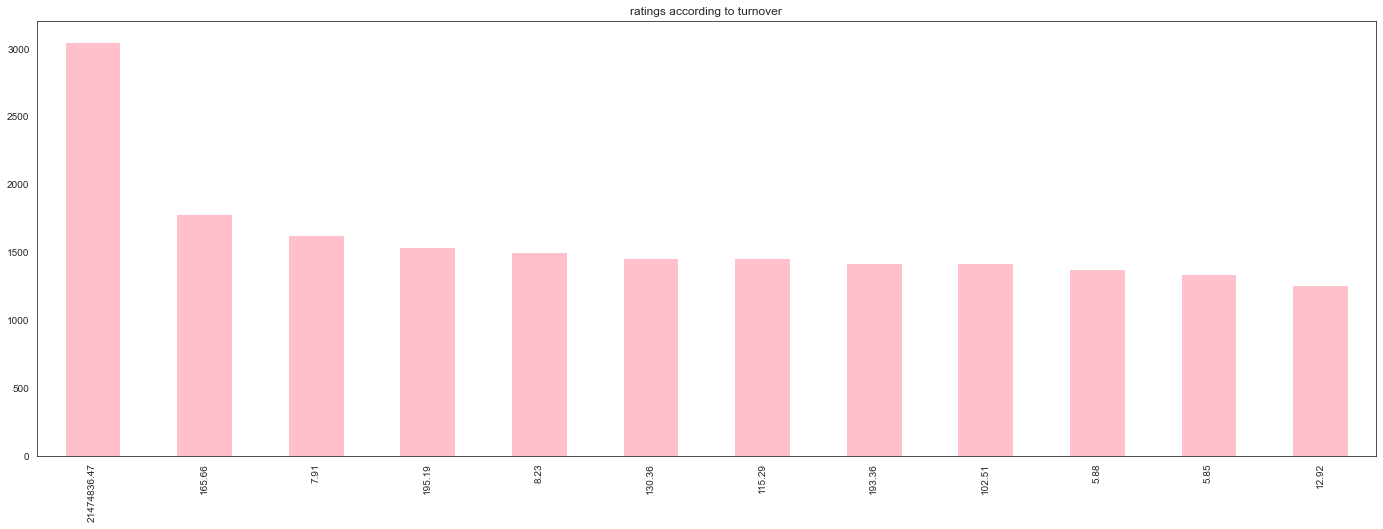

In [7]:
transaction['TX_AMOUNT'].value_counts().nlargest(12).plot(kind='bar',figsize=(24,8),title = "ratings according to turnover",color='pink')

<AxesSubplot:>

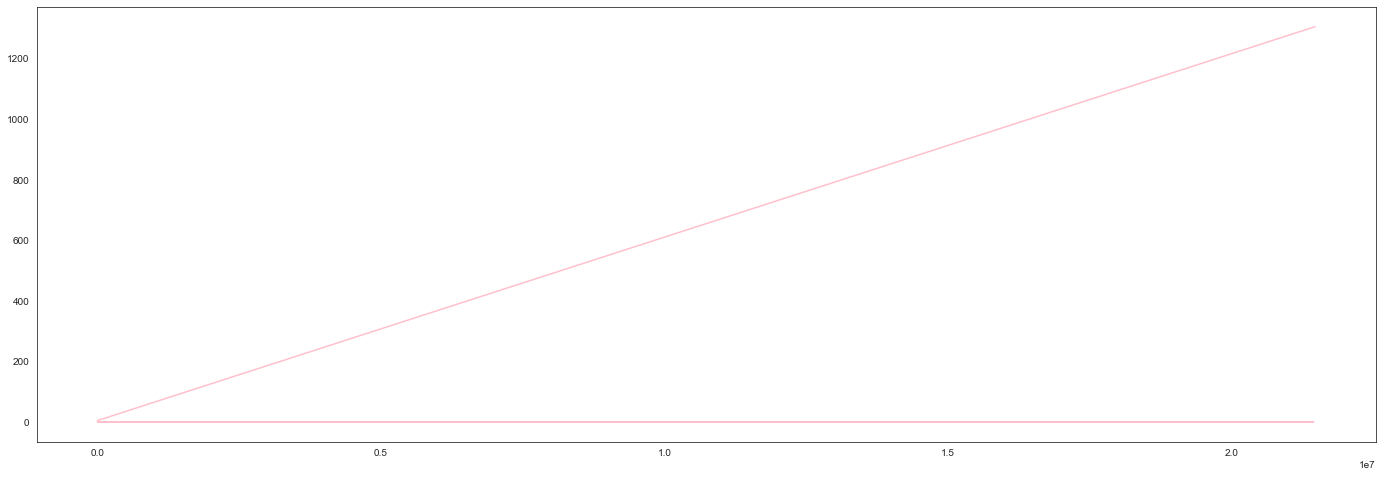

In [26]:
transaction.groupby('SENDER_ACCOUNT_ID')['TX_AMOUNT'].max().value_counts().plot(kind='line',figsize=(24,8),title = "",color='pink')

<AxesSubplot:xlabel='TX_AMOUNT', ylabel='TX_ID'>

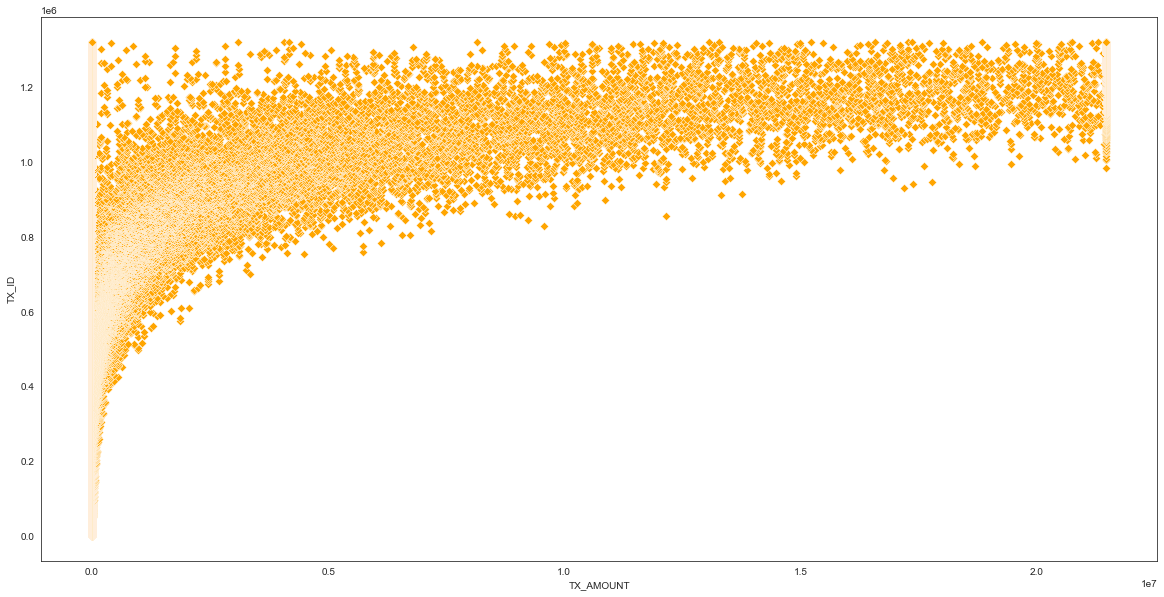

In [9]:
gr_yr = transaction.groupby(['TX_ID']).agg({'TX_AMOUNT':'max'})
plt.figure(figsize=(20,10))
sns.scatterplot(x=gr_yr.TX_AMOUNT,y=gr_yr.index, data=gr_yr,marker='D',color='orange')

it is clear that tax amount is showing an exponential nature over tx_id

<AxesSubplot:xlabel='TX_AMOUNT', ylabel='RECEIVER_ACCOUNT_ID'>

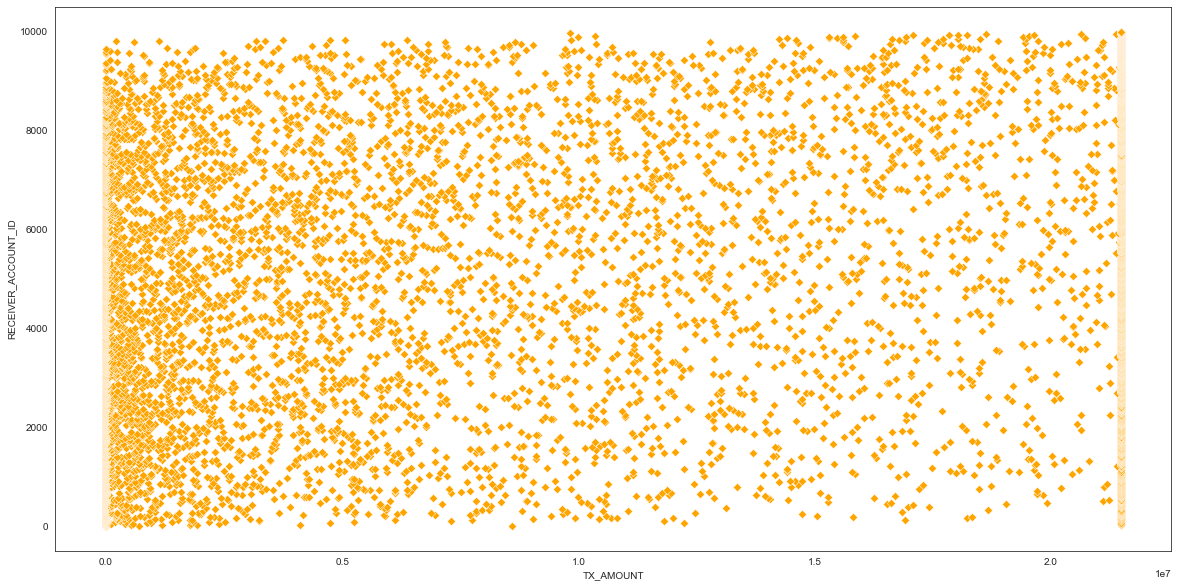

In [10]:
gr_yr = transaction.groupby(['RECEIVER_ACCOUNT_ID']).agg({'TX_AMOUNT':'max'})
plt.figure(figsize=(20,10))
sns.scatterplot(x=gr_yr.TX_AMOUNT,y=gr_yr.index, data=gr_yr,marker='D',color='orange')

as we can see as the no of tax amount is less no of transactions recived is more as the tax amount grew the no of transactions becomes less